##BEE - The Spiking Liquid Simulator

Here I want to study the effects of feedback into the liquid.

The liquid can be seen as a non linear MIMO (Multiple-Input Multiple-Output) system.

It's hard to define positive or negative feedback. Maybe positive feedback would be when there is an increase of the system's total energy. As the most important state variable of the system is the membrane voltage, I could suppose that the square of this total value would be proportional to the instantaneous energy of the network.



In [1]:
import sys
from BEE_python import *
reload(sys.modules['BEE_python']) # Makes sure the interpreter is going to reload the module

<module 'BEE_python' from 'BEE_python.pyc'>

## Testing the simulator

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

plt.rcParams['figure.figsize'] = 20, 10

In [3]:
BEE_free()

Simulator is not initialized!


In [4]:
seeds=numpy.array(numpy.random.randint(0,10000,5),dtype=numpy.uint32)
net_shape = numpy.array([8,8,80])
step_size = 1
connection_prob = 1.2

In [6]:
# Using the command line option (can reuse the liquid structure already generated):
%time simulator_main(["7","mega","0","-c", "-p"])

CPU times: user 515 ms, sys: 94.4 ms, total: 609 ms
Wall time: 635 ms


0

In [7]:
# Python initialization (cannot reuse a liquid):
# %time initialize_sim(my_net_shape = net_shape, my_lbd_value = connection_prob, my_seeds=seeds, SpkLiq_step = step_size*1E-3, SpkLiq_current_rand=[0, 0], SpkLiq_noisy_current_rand=0)
# %time initialize_sim(my_net_shape = net_shape, my_lbd_value = connection_prob, my_seeds=seeds, SpkLiq_step = step_size*1E-3)

In [8]:
BEE_initialized()

1

In [9]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    generate_connections()

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 10 µs


In [11]:
BEE_connected()

1

In [12]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    process_connections()

CPU times: user 17 µs, sys: 18 µs, total: 35 µs
Wall time: 32.2 µs


In [13]:
BEE_connected()

1

In [14]:
NofN,NoINHN,NoEXCN,NoINHC,NoEXCC=output_stats()

Total number of neurons: 1080000
Number of inhibitory neurons: 216000
Number of excitatory neurons: 864000
Number of inhibitory connections: 597368
Number of excitatory connections: 2003460


In [15]:
# Generates the first spike train

AINP = 10 # weight multiplier

sa_start = numpy.zeros(NofN)
sa_start[:NofN/3]=1
numpy.random.shuffle(sa_start)

exc_inputs = numpy.arange(NofN,dtype=numpy.int32)[sa_start>0]
inh_inputs = []
exc_weights = [AINP*1E-9]*len(exc_inputs)
inh_weights = []

In [16]:
# Injects some spikes into the liquid!

updates_sim(exc_inputs, inh_inputs, exc_weights, inh_weights,len(exc_inputs),0)

In [17]:
%%time
number_of_steps = 500

voltages_matrix0 = numpy.empty((NofN,number_of_steps),dtype=numpy.float32)
spikes_matrix0 = numpy.empty((NofN,number_of_steps),dtype=numpy.int32)

np_exc_weights = numpy.array(exc_weights)

for i in xrange(number_of_steps):
    spikes_matrix0[:,i] = output_sim(NofN).astype(dtype=numpy.int32) #reads the last spikes 1's/0's
    updates_sim([],[],[],[],0,0) # No feedback
    voltages_matrix0[:,i]=output_voltages(NofN) #reads the voltages

CPU times: user 50.1 s, sys: 1.38 s, total: 51.5 s
Wall time: 21.6 s


In [18]:
BEE_free()

1437583222.080893

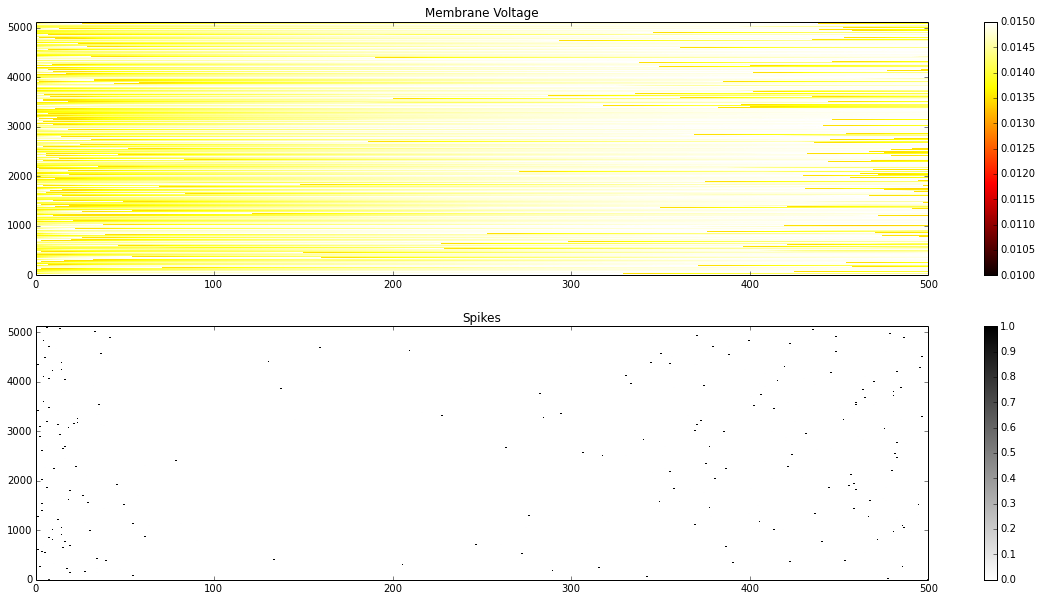

In [19]:
step_range=0,number_of_steps;
neurons_range=0,5120;

plt.subplot(211);
plt.imshow(voltages_matrix0[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.hot,vmin=10E-3,vmax=15.0E-3);
plt.title("Membrane Voltage");
plt.colorbar();

plt.subplot(212);
plt.imshow(spikes_matrix0[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.gray_r,vmin=0,vmax=1);
plt.title("Spikes");
plt.colorbar();

In [20]:
print "Total Number of Spikes Generated in the Simulation:%d\nTotal Number of Spikes Showing Above:%d\nFigure's Spike Density(%%):%f"%\
(spikes_matrix0.sum(),(spikes_matrix0[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum(),100*(spikes_matrix0[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum()/float((neurons_range[1]-neurons_range[0])*(step_range[1]-step_range[0])))

Total Number of Spikes Generated in the Simulation:752533
Total Number of Spikes Showing Above:3340
Figure's Spike Density(%):0.130469


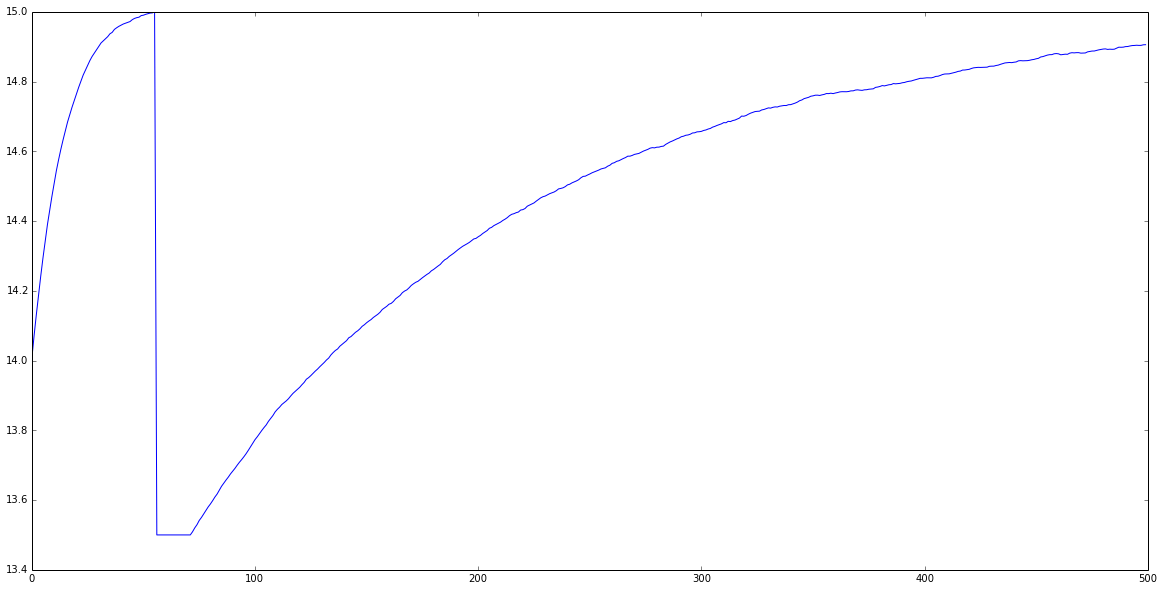

In [21]:
plt.plot(voltages_matrix0[0,:]*1E3);
plt.xlim(step_range[0],step_range[1]);

#Now with the positive feedback

In [22]:
K=1

In [23]:
# Using the command line option (can reuse the liquid structure already generated):
%time simulator_main(["7","mega","0","-c", "-p"])

CPU times: user 499 ms, sys: 87.1 ms, total: 586 ms
Wall time: 642 ms


0

In [24]:
# %time initialize_sim(my_net_shape = net_shape, my_lbd_value = connection_prob, my_seeds=seeds, SpkLiq_step = step_size*1E-3)

In [25]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    generate_connections()

CPU times: user 8 µs, sys: 20 µs, total: 28 µs
Wall time: 22.9 µs


In [26]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    process_connections()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


In [27]:
NofN,NoINHN,NoEXCN,NoINHC,NoEXCC=output_stats()

Total number of neurons: 1080000
Number of inhibitory neurons: 216000
Number of excitatory neurons: 864000
Number of inhibitory connections: 597368
Number of excitatory connections: 2003460


In [28]:
# Injects some spikes into the liquid!
# The same spike train as the first experiment
updates_sim(exc_inputs, inh_inputs, exc_weights, inh_weights,len(exc_inputs),0)

In [29]:
%%time
voltages_matrix1 = numpy.empty((NofN,number_of_steps),dtype=numpy.float32)
spikes_matrix1 = numpy.empty((NofN,number_of_steps),dtype=numpy.int32)

for i in xrange(number_of_steps):
    spikes = reads_spikes(NofN) #reads the last spikes indices
    spikes_matrix1[:,i] = output_sim(NofN).astype(dtype=numpy.int32) #reads the last spikes 1's/0's
    updates_sim(spikes, [], [K*AINP*1E-9]*spikes.shape[0], [], spikes.shape[0], 0) #feeds back
    voltages_matrix1[:,i]=output_voltages(NofN) #reads the voltages

CPU times: user 51 s, sys: 2.12 s, total: 53.2 s
Wall time: 23.9 s


In [30]:
BEE_free()

1437583271.382462

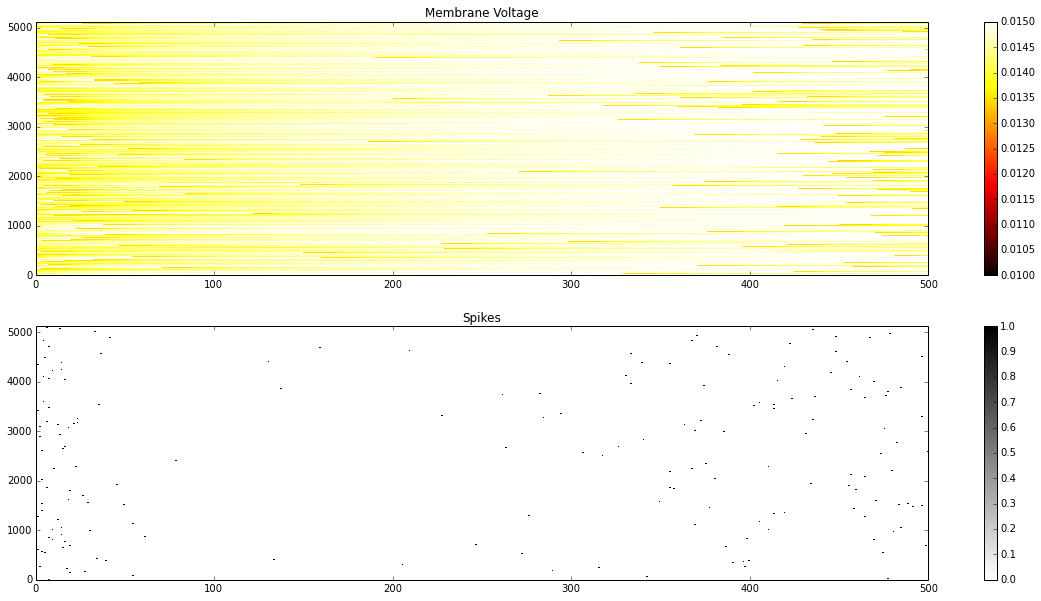

In [31]:
plt.subplot(211);
plt.imshow(voltages_matrix1[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.hot,vmin=10E-3,vmax=15.0E-3);
plt.title("Membrane Voltage");
plt.colorbar();

plt.subplot(212);
plt.imshow(spikes_matrix1[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.gray_r,vmin=0,vmax=1);
plt.title("Spikes");
plt.colorbar();

In [32]:
print "Total Number of Spikes Generated in the Simulation:%d\nTotal Number of Spikes Showing Above:%d\nFigure's Spike Density(%%):%f"%\
(spikes_matrix1.sum(),(spikes_matrix1[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum(),100*(spikes_matrix1[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum()/float((neurons_range[1]-neurons_range[0])*(step_range[1]-step_range[0])))

Total Number of Spikes Generated in the Simulation:798442
Total Number of Spikes Showing Above:3506
Figure's Spike Density(%):0.136953


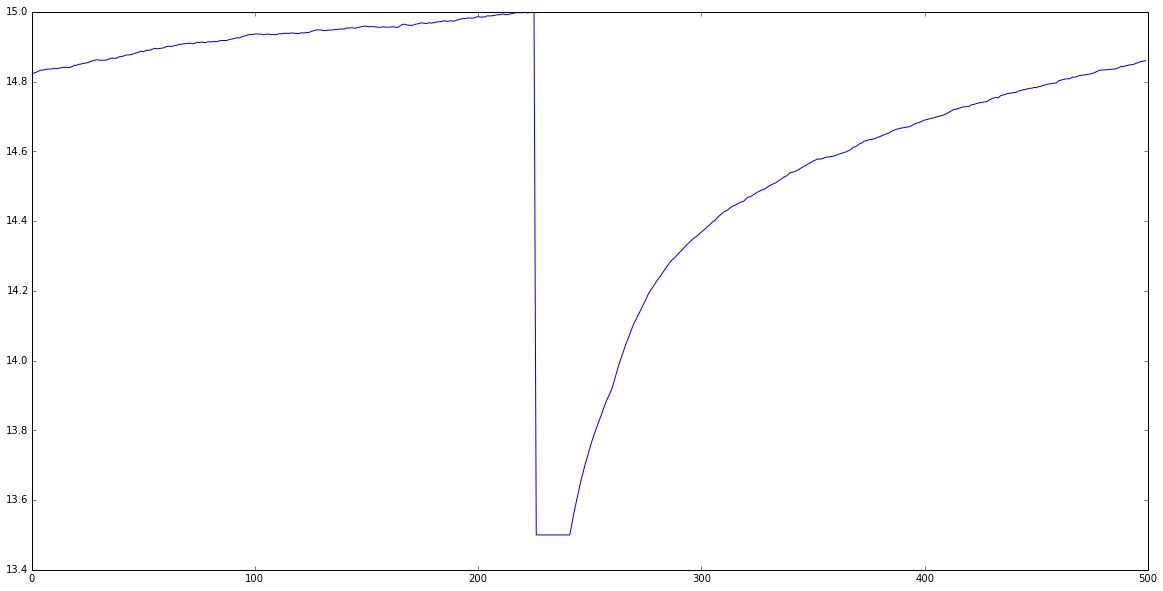

In [33]:
plt.plot(voltages_matrix1[1000,:]*1E3);
plt.xlim(step_range[0],step_range[1]);

#Now with the negative feedback

In [34]:
K=1

In [35]:
# Using the command line option (can reuse the liquid structure already generated):
%time simulator_main(["7","mega","0","-c", "-p"])

CPU times: user 601 ms, sys: 159 ms, total: 760 ms
Wall time: 1.73 s


0

In [36]:
# %time initialize_sim(my_net_shape = net_shape, my_lbd_value = 4.0, my_seeds=seeds, SpkLiq_step = step_size*1E-3)

In [37]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    generate_connections()

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10 µs


In [38]:
%%time 
if BEE_initialized() and (not BEE_connected()):
    process_connections()

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.06 µs


In [39]:
NofN,NoINHN,NoEXCN,NoINHC,NoEXCC=output_stats()

Total number of neurons: 1080000
Number of inhibitory neurons: 216000
Number of excitatory neurons: 864000
Number of inhibitory connections: 597368
Number of excitatory connections: 2003460


In [40]:
# Injects some spikes into the liquid!
# The same spike train as the first experiment
updates_sim(exc_inputs, inh_inputs, exc_weights, inh_weights,len(exc_inputs),0)

In [41]:
voltages_matrix2 = numpy.empty((NofN,number_of_steps),dtype=numpy.float32)
spikes_matrix2 = numpy.empty((NofN,number_of_steps),dtype=numpy.int32)

for i in xrange(number_of_steps):
    spikes = reads_spikes(NofN) #reads the last spikes indices
    spikes_matrix2[:,i] = output_sim(NofN).astype(dtype=numpy.int32) #reads the last spikes 1's/0's
    updates_sim([], spikes, [], [-K*AINP*1E-9]*spikes.shape[0], 0, spikes.shape[0]) #feeds back into the 
    voltages_matrix2[:,i]=output_voltages(NofN) #reads the voltages

In [42]:
BEE_free()

1437583373.473058

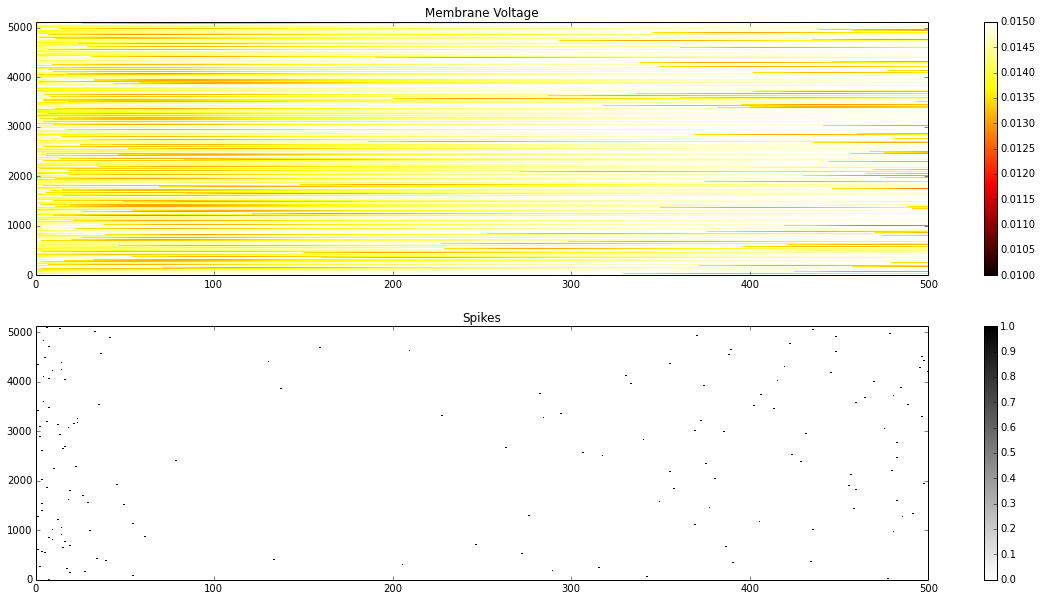

In [43]:
plt.subplot(211);
plt.imshow(voltages_matrix2[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.hot,vmin=10E-3,vmax=15.0E-3);
plt.title("Membrane Voltage");
plt.colorbar();

plt.subplot(212);
plt.imshow(spikes_matrix2[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]], interpolation='none', origin='lower', aspect='auto',extent=[step_range[0]*step_size,step_range[1]*step_size,neurons_range[0],neurons_range[1]],cmap=cm.gray_r,vmin=0,vmax=1);
plt.title("Spikes");
plt.colorbar();

In [44]:
print "Total Number of Spikes Generated in the Simulation:%d\nTotal Number of Spikes Showing Above:%d\nFigure's Spike Density(%%):%f"%\
(spikes_matrix2.sum(),(spikes_matrix2[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum(),100*(spikes_matrix2[neurons_range[0]:neurons_range[1],step_range[0]:step_range[1]]).sum()/float((neurons_range[1]-neurons_range[0])*(step_range[1]-step_range[0])))

Total Number of Spikes Generated in the Simulation:651069
Total Number of Spikes Showing Above:2932
Figure's Spike Density(%):0.114531


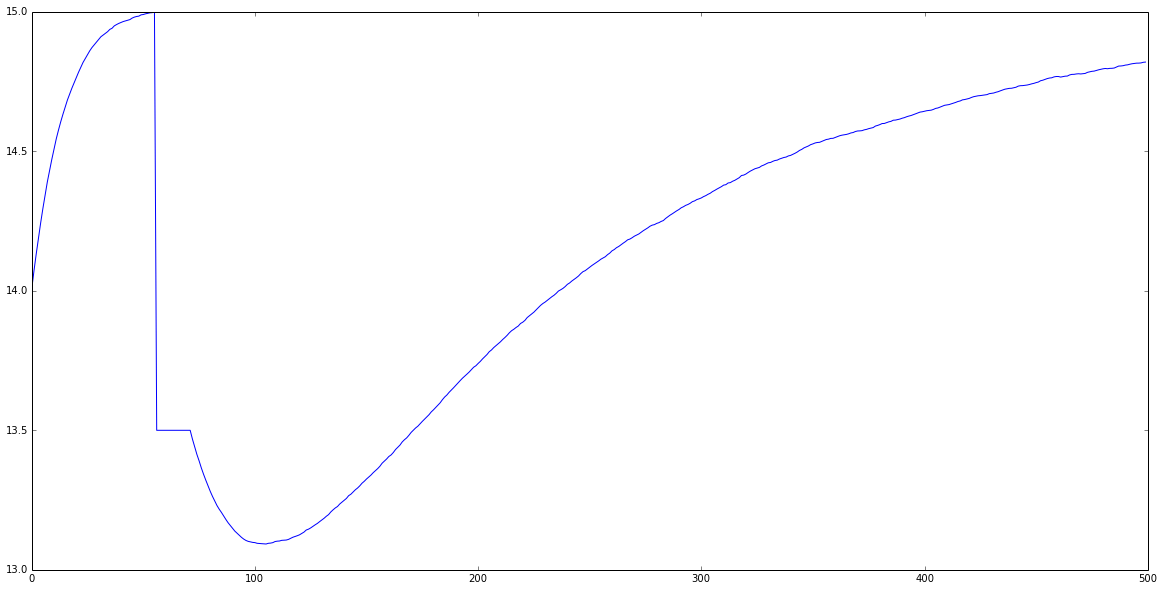

In [45]:
plt.plot(voltages_matrix2[0,:]*1E3);
plt.xlim(step_range[0],step_range[1]);

# How to use the imshow

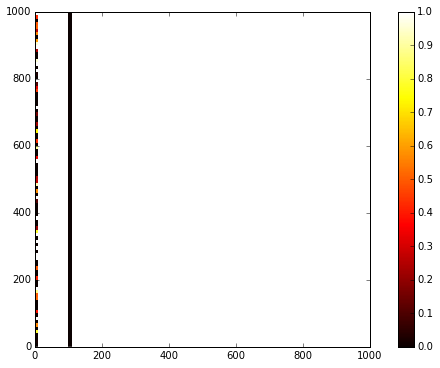

In [3]:
# input_matrix=numpy.random.normal(loc=0,scale=1,size=(1000,100))
input_matrix=numpy.ones((100,100),dtype=numpy.float)
input_matrix[:,0]=numpy.random.normal(loc=0,scale=1,size=100)
input_matrix[:,10]=numpy.zeros(100)
plt.imshow(input_matrix, interpolation='none', origin='lower', extent=[0,1000,0,1000],cmap=cm.hot,vmin=0,vmax=1);
# aspect='auto' stretchs the image!
plt.colorbar();